In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import train values

train_values=pd.read_csv('train_values.csv')
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# import labels

train_labels=pd.read_csv('train_labels.csv')
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
#checking the shape

print(train_labels.shape)
print(train_values.shape)

(260601, 2)
(260601, 39)


In [5]:
train_values.dtypes     #objects needs to be converted in numbers

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [6]:
# transforming text to numbers

def manipulate(df):
    listobject=df.dtypes=='object'           # create a list of columns that contains objects 
    nomicolonne=df.loc[:,listobject].keys()     #give the name of columns that contains objects 
    df_new=df.copy()                         # create a disconnected dataframe (the original one is preserved)
    for i in range(len(nomicolonne)):
        aa=np.sort(df[nomicolonne[i]].unique())           # create labeles
        bb=np.arange(0,len(aa))                         # create numbers associated to labels
        dictionary=dict(zip(aa,bb))                       # create a dictionary to be mapped in the columns
        df_new[nomicolonne[i]]=df_new[nomicolonne[i]].map(dictionary)      # map the dictionary into the column
        print(aa)
    return df_new

In [7]:
# manipulating entries

train_values_new=manipulate(train_values)
train_values2=train_values_new.drop(columns='building_id')
train_labels2=train_labels.drop(columns='building_id')
X=np.array(train_values2)
y=np.array(train_labels2['damage_grade'])

# the scaling of the variables is not useful in this case, since the code becomes much slower

['n' 'o' 't']
['h' 'i' 'r' 'u' 'w']
['n' 'q' 'x']
['f' 'm' 'v' 'x' 'z']
['j' 'q' 's' 'x']
['j' 'o' 's' 't']
['a' 'c' 'd' 'f' 'm' 'n' 'o' 'q' 's' 'u']
['a' 'r' 'v' 'w']


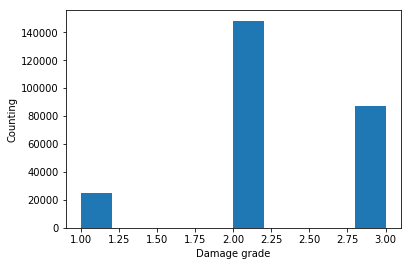

In [8]:
# the output is not balanced. I am going to use stratify in the train_test_split function

plt.hist(y)
plt.xlabel('Damage grade')
plt.ylabel('Counting')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,log_loss
from sklearn.model_selection import cross_val_score


In [10]:
# uncomment to analyze the performance of the code, as a function of n_neighbors and the dimension of the test_size

#listscore=[]

#for j in ([10,20,30]):
#    for i in range(1,21):
#        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=j/100,stratify=y)
#        knn=KNeighborsClassifier(n_neighbors=i)
#        knn.fit(x_train,y_train)
#        scoreparz=knn.score(x_test,y_test)
#        listscore.append([j/100,i,scoreparz])
#        print(j/100,i,scoreparz)

In [11]:
#np.savetxt('parameter_scan.txt',listscore)
#dfscore=pd.DataFrame(listscore)

dfscore=pd.read_csv('parameter_scan.txt',header=None,delimiter=r"\s+")
dfscore.head()
dfscore.columns=['test_set_frac','n_neighbors','score']
dfpivot=dfscore.pivot(index='n_neighbors',columns='test_set_frac',values='score')

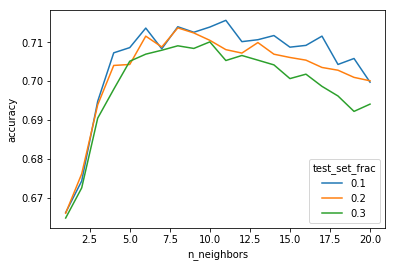

In [12]:
dfpivot.plot()
plt.ylabel('accuracy')
plt.show()

In [24]:
# this is the training section

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y)

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print("----------------------------------------------------") 
print("Confusion matrix \n"+str(confusion_matrix(y_pred,y_test))) 
print("----------------------------------------------------") 
print("Report \n"+str(classification_report(y_pred,y_test))) 
print("----------------------------------------------------")
#print("Cross validation "+str(np.mean(cross_val_score(knn,X,y,cv=3,scoring='f1_micro'))))

----------------------------------------------------
Confusion matrix 
[[ 1212   707   111]
 [ 1196 12310  3611]
 [  105  1809  5000]]
----------------------------------------------------
Report 
             precision    recall  f1-score   support

          1       0.48      0.60      0.53      2030
          2       0.83      0.72      0.77     17117
          3       0.57      0.72      0.64      6914

avg / total       0.73      0.71      0.72     26061

----------------------------------------------------


['n' 'o' 't']
['h' 'i' 'r' 'u' 'w']
['n' 'q' 'x']
['f' 'm' 'v' 'x' 'z']
['j' 'q' 's' 'x']
['j' 'o' 's' 't']
['a' 'c' 'd' 'f' 'm' 'n' 'o' 'q' 's' 'u']
['a' 'r' 'v' 'w']


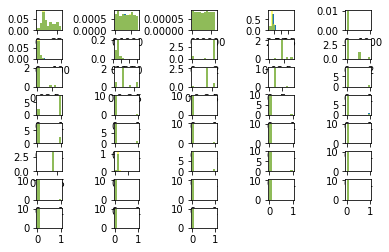

In [14]:
# import test values

test_values=pd.read_csv('test_values.csv')
test_values_new=manipulate(test_values)
test_values2=test_values_new.drop(columns='building_id')
Xtest=np.array(test_values2)

#checking the overlap between traning and test dataset

for i in range(X.shape[1]):
    plt.subplot(8,5,i+1)
    plt.hist(X[:,i],density=True)
    plt.hist(Xtest[:,i],density=True,color='yellow',alpha=0.5)
    plt.subplots_adjust(hspace =0.4,wspace=2)
plt.show()

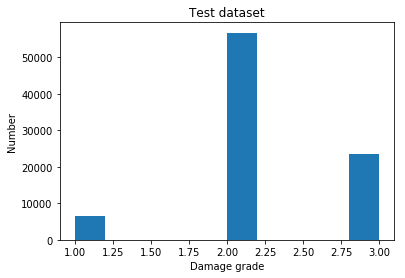

In [26]:
# final prediction and plot of the result

finalprediction=knn.predict(Xtest)   #prediction using test values

plt.hist(finalprediction)
plt.xlabel('Damage grade')
plt.ylabel('Number')
plt.title('Test dataset')
plt.show()

In [27]:
# preparing the submission file

df=pd.DataFrame(test_values['building_id'])               
df['damage_grade']=finalprediction

In [28]:
#exporting the submission file

df.to_csv('submission-knn.csv',index=False)     

# THE MAIN CODE ENDS HERE

In [18]:
# this is a smaller dataset, used to test each individual feature

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.8,stratify=y)

x_train2,x_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.1,stratify=y)

In [19]:
# I analyze the features unsing a reduced dataset (20% training, 10% validation)

#knn=KNeighborsClassifier(n_neighbors=5)

#featurescore=[]

#for i in range(X.shape[1]):
#    knn.fit(x_train[:,i].reshape(-1,1),y_train)
#    y_pred=knn.predict(x_test2[:,i].reshape(-1,1))
#    score=knn.score(x_test2[:,i].reshape(-1,1),y_test2)
#    featurescore.append([i,score])
#    print(i,score)

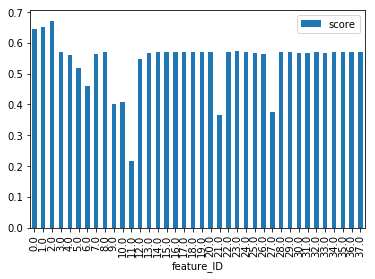

In [20]:
#np.savetxt('featurescore.txt',featurescore)

# some feature shows weak correlations with the results

dffeature=pd.read_csv('featurescore.txt',header=None,delimiter=r"\s+")
dffeature.columns=['feature_ID','score']
dffeature.index=dffeature['feature_ID']
dffeature=dffeature.drop(columns='feature_ID')

dffeature.plot(kind='bar')
plt.show()

In [21]:
# an attempt using a reduced dataset (reduced features)

def scaling(xx,xref):         #this function normalizes the entries. However, when it is used, the algorithm becomes very slow
    mm=np.mean(xref,axis=0)
    ss=np.std(xref,axis=0)
    return (xx-mm)/ss    

#Xred=scaling(X[:,[0,1,2]],X[:,[0,1,2]])
featuretotake=np.array(dffeature['score']>0.5)

Xred=X[:,featuretotake]

x_train,x_test,y_train,y_test=train_test_split(Xred,y,test_size=0.15,stratify=y)

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

print("----------------------------------------------------") 
print("Confusion matrix \n"+str(confusion_matrix(y_pred,y_test))) 
print("----------------------------------------------------") 
print("Report \n"+str(classification_report(y_pred,y_test))) 
print("----------------------------------------------------")
print("Cross validation "+str(np.mean(cross_val_score(knn,Xred,y,cv=3,scoring='f1_micro'))))

----------------------------------------------------
Confusion matrix 
[[ 1856  1142   163]
 [ 1727 18447  5388]
 [  186  2650  7532]]
----------------------------------------------------
Report 
             precision    recall  f1-score   support

          1       0.49      0.59      0.54      3161
          2       0.83      0.72      0.77     25562
          3       0.58      0.73      0.64     10368

avg / total       0.73      0.71      0.72     39091

----------------------------------------------------
Cross validation 0.7063249970464983
